In [1]:
# scikit-learn有两个函数用于获取分类器不确定度估计:decision_function和predict_proba

In [7]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
y_named = np.array(["blue", "red"])[y]
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(
            X, y_named, y, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [8]:
# 决策函数 decision_function
# 对于二分类的情况，返回值的形式是(n_samples,)，每个样本都返回一个浮点数
# 对于类别1来说，这个值表示模型对该数据点属于“正”类的置信程度。
# 正值表示对正类的偏好，负值表示对“反类”(其他类)的偏好
print("X_test.shape:{}".format(X_test.shape))
print("Decision fuction shape:{}".format(gbrt.decision_function(X_test).shape))
print("Thresholded decision function:\n{}".format
              (gbrt.decision_function(X_test) > 0))
print("Prediction:\n{}".format(gbrt.predict(X_test)))

X_test.shape:(25, 2)
Decision fuction shape:(25,)
Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Prediction:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [9]:
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
pred = gbrt.classes_[greater_zero]
print("pred is equal to predictions:{}".format(
            np.all(pred == gbrt.predict(X_test))))

pred is equal to predictions:True


In [13]:
# decision_function可以在任意范围取值，这取决于数据与模型参数
decision_function = gbrt.decision_function(X_test)
print("Decision function minimum:{:.2f} maximum:{:.2f}".format(
    np.min(decision_function), np.max(decision_function)))

Decision function minimum:-7.69 maximum:4.29


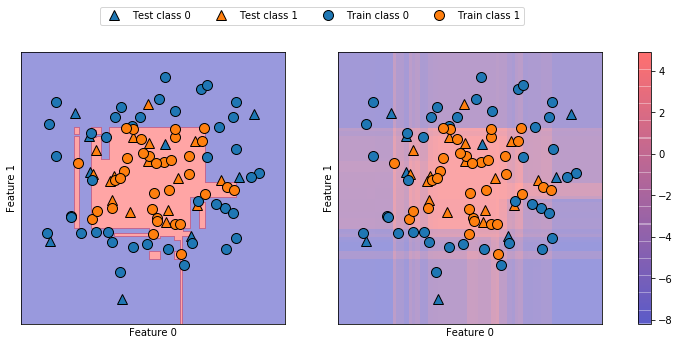

In [26]:
# 利用颜色编码绘制所有点的decision_function二维平面图及决策边界
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn

fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, 
                                fill=True,cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4,
                                             cm=mglearn.ReBl)
for ax in axes:
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test, 
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, 
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0", 
                "Train class 1",], ncol=4, loc=(.3, 1.1))

In [17]:
# 预测概率 predict_proba 的输出是每个类别的概率
# 对于二分类问题， 它的形状始终是(n_samples, 2)
print("Shape of probabilities:{}".format(gbrt.predict_proba(X_test).shape))

Shape of probabilities:(25, 2)


In [18]:
# 每行的第一个元素是对第一个类别的估计概率，第二个元素是对第二个类别的估计概率
# 两个元素总是在0和1之前，两个类别的元素之和始终为1
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test[:6])))

Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


In [19]:
# 如果模型给出的不确定度符合实际情况，那么这个模型被称为校正模型
# 在校正模型中，如果预测有70%的确定度，那么它在70%的情况下正确

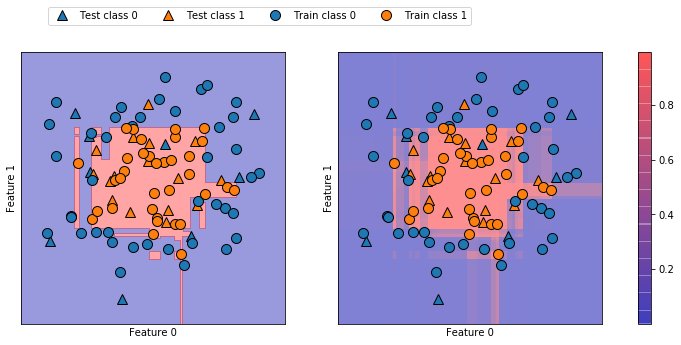

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, 
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.5,
                            cm=mglearn.ReBl, function='predict_proba')
for ax in axes:
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test, 
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, 
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0", 
                "Train class 1",], ncol=4, loc=(.1, 1.1))

In [30]:
# -----------------------------------------------------------------

In [31]:
# 多分类问题的不确定度

In [32]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                   random_state=42)
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)
print("Decision function shape:{}".format(gbrt.decision_function(X_test).shape))
print("Decidion function:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

Decision function shape:(38, 3)
Decidion function:
[[-1.9957153   0.04758118 -1.92721297]
 [ 0.0614655  -1.90755689 -1.92793177]
 [-1.99058105 -1.87637856  0.09686741]
 [-1.9957153   0.04758118 -1.92721297]
 [-1.99730166 -0.13469231 -1.20341532]
 [ 0.0614655  -1.90755689 -1.92793177]]


In [33]:
# 对于多分类情况，decision_function的形状为(n_samples, n_classes)

In [34]:
print("Argmax of decision function:\n{}".format(
            np.argmax(gbrt.decision_function(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [35]:
# 对于多分类,predict_proba的形状也是(n_samples, n_classes)，同样，概率和为1
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test)[:6]))
print("Sums:{}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

Predicted probabilities:
[[0.10217734 0.78840063 0.10942203]
 [0.7834712  0.1093673  0.1071615 ]
 [0.09818079 0.11005862 0.79176059]
 [0.10217734 0.78840063 0.10942203]
 [0.10360014 0.66723882 0.22916105]
 [0.7834712  0.1093673  0.1071615 ]]
Sums:[1. 1. 1. 1. 1. 1.]


In [36]:
print("Argmax of predicted probabilities:\n{}".format(
        np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [37]:
# 以数据集真是类别名称进行对比
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("unique classes in training data:{}".format(logreg.classes_))
print("predictions:{}".format(logreg.predict(X_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("argmax of decision function:{}".format(argmax_dec_func[:10]))
print("argmax combined with classes_:{}".format(
        logreg.classes_[argmax_dec_func][:10]))

unique classes in training data:['setosa' 'versicolor' 'virginica']
predictions:['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
argmax of decision function:[1 0 2 1 1 0 1 2 1 1]
argmax combined with classes_:['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [42]:
# ----------------------------------------------------------
# 个算法简易总结

In [43]:
# 最近邻，适用于小型数据集，是最好的基准模型，很容易解释

# 线性模型，非常可靠的首选算法，适用于非常大的数据集，也适用于高维数据

# 朴素贝叶斯，只适用于分类问题，比线性模型速度还快，适用于非常大的数据集和高维数据，
# 精度通常要低于线性模型

# 决策树，速度很快，不需要数据缩放，可以可视化，很容易理解

# 随机森林，几乎总是比单颗决策树的表现要好，鲁棒性很好，非常强大。不需要缩放数据，
# 不适用于高维稀疏数据

# 梯度提升决策树，精度通常比随机森林略高。与随机森林相比，训练速度更慢，但预测速度更快，
# 需要内存也更少，比随机森林需要更多的参数调节

# 支持向量机，对于特征含义相似的中等大小的数据集很强大，需要数据缩放，对参数敏感

# 神经网络，可以构建非常复杂的模型，特别是对于大型数据集而言，对数据缩放敏感，
# 对参数选取敏感，大型网络需要很长的训练时间